In [9]:
import segyio
import matplotlib.pyplot as plt

segy_file_path = r"C:\Users\eiGroup - Nadir\Desktop\SPP\GR_cube\GR_cube_HDOBN_Z.sgy"
v = segyio.open(segy_file_path)

In [38]:
v.tracecount

7729771

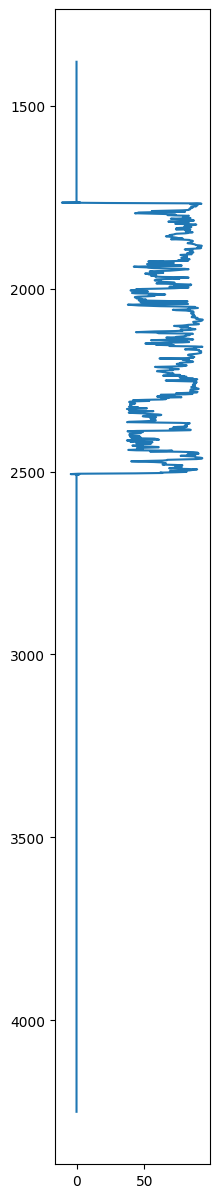

In [33]:
plt.figure(figsize=(2, 15))
plt.plot(v.xline[v.xlines[600]][4500], v.samples)
plt.gca().invert_yaxis()

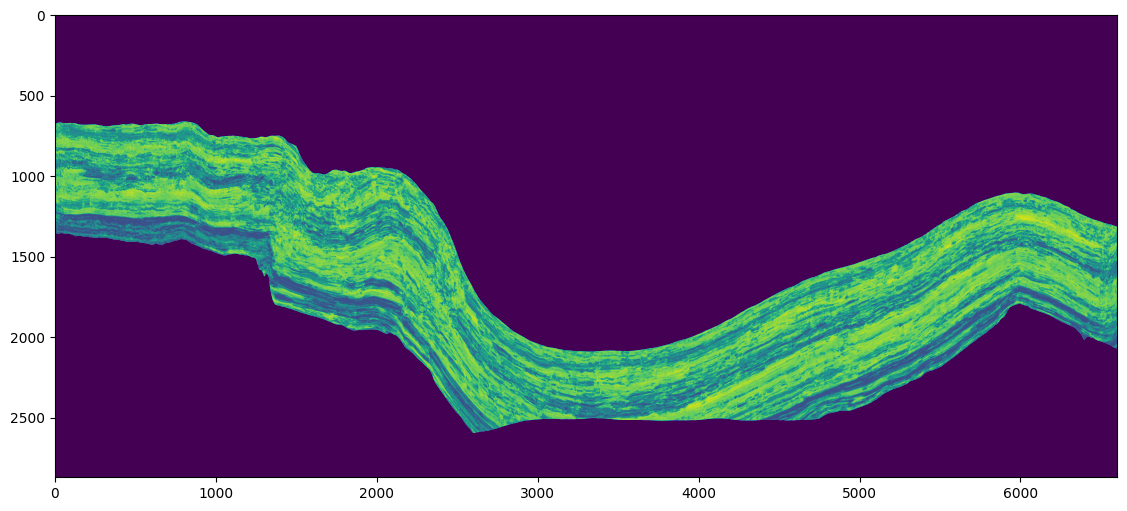

In [42]:
plt.figure(figsize=(18,6))
plt.imshow(v.xline[v.xlines[1000]].T, vmin=20, vmax=100)

In [43]:
import segyio

# Specify the path to your SEG-Y file
segy_file_path = r"C:\Users\eiGroup - Nadir\Desktop\SPP\GR_cube\GR_cube_HDOBN_Z.sgy"

# Open the SEG-Y file for reading
with segyio.open(segy_file_path, "r") as segyfile:
    # Get general information
    print("Number of traces:", len(segyfile.trace))
    print("Number of samples per trace:", segyfile.samples.size)
    print("Data format:", segyfile.format)
    # print("Trace header format:", segyfile.header_format)

    # # Get trace header keys (columns)
    # trace_header_keys = segyfile.attributes()
    # print("Trace header keys (columns):", trace_header_keys)

    # Print a sample of trace header values (first 5 traces)
    for trace_num in range(min(len(segyfile.trace), 1)):
        trace_header = segyfile.header[trace_num]
        print(f"Trace {trace_num + 1} header values:", trace_header)

    # print()
    # # Get additional information
    # other_info = {
    #     "Sample rate": segyfile.bin,
    #     "Data format code": segyfile.bin,
    #     # Add more fields as needed
    # }
    # print("Other information:", other_info)

Number of traces: 7729771
Number of samples per trace: 2871
Data format: 4-byte IEEE float
Trace 1 header values: {TRACE_SEQUENCE_LINE: 1, TRACE_SEQUENCE_FILE: 600, FieldRecord: 600, TraceNumber: 1, EnergySourcePoint: 0, CDP: 1400, CDP_TRACE: 1, TraceIdentificationCode: 1, NSummedTraces: 0, NStackedTraces: 0, DataUse: 1, offset: 0, ReceiverGroupElevation: 0, SourceSurfaceElevation: 0, SourceDepth: 0, ReceiverDatumElevation: 0, SourceDatumElevation: 0, SourceWaterDepth: 0, GroupWaterDepth: 0, ElevationScalar: 1, SourceGroupScalar: -100, SourceX: 50497540, SourceY: 444550884, GroupX: 0, GroupY: 0, CoordinateUnits: 1, WeatheringVelocity: 0, SubWeatheringVelocity: 0, SourceUpholeTime: 0, GroupUpholeTime: 0, SourceStaticCorrection: 0, GroupStaticCorrection: 0, TotalStaticApplied: 0, LagTimeA: 1380, LagTimeB: 0, DelayRecordingTime: 1380, MuteTimeStart: 0, MuteTimeEND: 0, TRACE_SAMPLE_COUNT: 2871, TRACE_SAMPLE_INTERVAL: 1000, GainType: 0, InstrumentGainConstant: 0, InstrumentInitialGain: 0, C

In [ ]:
import segyio
import numpy as np
from shutil import copyfile

filename = r"C:\Users\eiGroup - Nadir\Desktop\SPP\GR_cube\GR_cube_HDOBN_Z.sgy"
with segyio.open(filename) as segyfile:

    # Memory map file for faster reading (especially if file is big...)
    segyfile.mmap()

    # Print binary header info
    print(segyfile.bin)
    print(segyfile.bin[segyio.BinField.Traces])

    # Read headerword inline for trace 10
    print(segyfile.header[10][segyio.TraceField.INLINE_3D])

    # Print inline and crossline axis
    print(segyfile.xlines)
    print(segyfile.ilines)

    # Read data along first xline
    data = segyfile.xline[segyfile.xlines[1]]
    
    # Read data along last iline
    data = segyfile.iline[segyfile.ilines[-1]]
    
    # Read data along 100th time slice
    data = segyfile.depth_slice[100]
    
    # Read data cube
    data = segyio.tools.cube(filename)